In [27]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [28]:
%matplotlib inline

In [29]:
btc = yf.download(tickers='BTC-USD', period='2y', interval = '1h')

[*********************100%***********************]  1 of 1 completed


In [30]:
btc.reset_index(inplace=True)
btc.rename(columns = {'index':'Date'}, inplace = True)
btc.reset_index(inplace=True)
#btc['Date'] = pd.to_datetime(btc['Date'])
#btc.set_index('Date')

In [31]:
btc.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2019-04-14 02:00:00+01:00,5090.080078,5099.529785,5084.970215,5084.970215,5084.970215,0
1,1,2019-04-14 03:00:00+01:00,5084.950195,5094.080078,5065.470215,5066.819824,5066.819824,2978098
2,2,2019-04-14 04:00:00+01:00,5068.560059,5080.439941,5061.700195,5065.959961,5065.959961,3356457
3,3,2019-04-14 05:00:00+01:00,5067.060059,5076.270020,5053.640137,5063.160156,5063.160156,2903882
4,4,2019-04-14 06:00:00+01:00,5063.259766,5067.439941,5034.939941,5059.649902,5059.649902,8203589


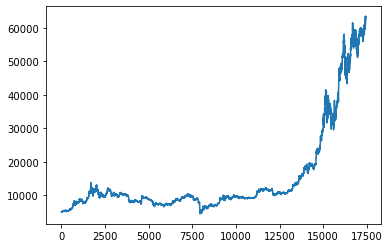

In [32]:
plt.plot(btc['index'], btc['Close'])

We can see that the price movement of bitcoin has been exponential in recent history,therefore, we will use polynomial linear regression.

In [33]:
dataset = btc[['index', 'Volume', 'Close']]

In [34]:
# Vectorize the dataset
X = dataset.iloc[:, 0].values.reshape(-1, 1)
y = dataset.iloc[:, -1].values

In [35]:
# Train the Linear Regression Model on the whole dataset
from sklearn.linear_model import LinearRegression
# Create instance of LinearRegression class
lin_reg = LinearRegression()
# Fit the model with entire dataset
lin_reg.fit(X, y)

LinearRegression()

In [36]:
# Create matrix of powered features
from sklearn.preprocessing import PolynomialFeatures
# Create instance of PolynomialFeatures class with starting n
poly_reg = PolynomialFeatures(degree = 2)
# Tranform simple vectors into matrix of features
X_poly = poly_reg.fit_transform(X)

In [37]:
# Train LinearRegression model with new matrix of features
# Create new instance of LinearRegression class
lin_reg_2 = LinearRegression()
# Train model on new matrix of features
lin_reg_2.fit(X_poly, y)

LinearRegression()

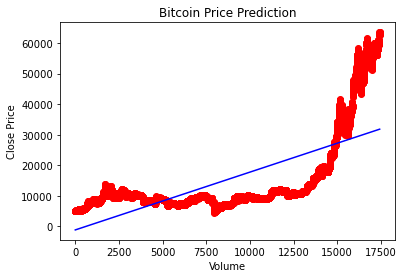

In [38]:
# Visualize the Linear Regression results
# Plot the "real" results
plt.scatter(X, y, color="red")
# Plot the predicted results
plt.plot(X, lin_reg.predict(X), color="blue")
plt.title('Bitcoin Price Prediction')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

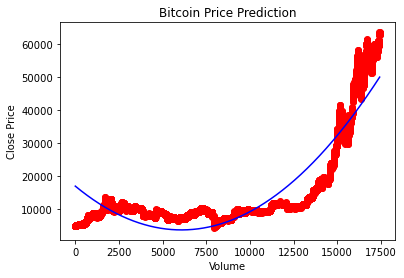

In [39]:
# Visualize the Polynomial Linear Regression results
# Plot the "real" results
plt.scatter(X, y, color="red")
# Plot the predicted results
plt.plot(X, lin_reg_2.predict(X_poly), color="blue")
plt.title('Bitcoin Price Prediction')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

In [40]:
# Retrain Polynomial Regression Model with higher degree to see if we can get a more acccurate result
# Create matrix of powered features
from sklearn.preprocessing import PolynomialFeatures
# Create instance of PolynomialFeatures class with starting n
poly_reg = PolynomialFeatures(degree = 4)
# Tranform simple vectors into matrix of features
X_poly = poly_reg.fit_transform(X)
# Train LinearRegression model with new matrix of features
# Create new instance of LinearRegression class
lin_reg_2 = LinearRegression()
# Train model on new matrix of features
lin_reg_2.fit(X_poly, y)

LinearRegression()

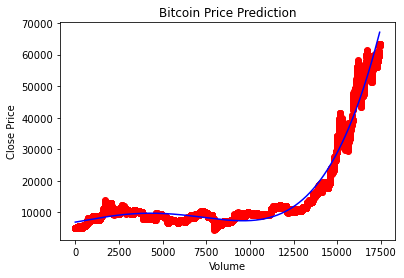

In [41]:
# Visualize the Polynomial Linear Regression results
# Plot the "real" results
plt.scatter(X, y, color="red")
# Plot the predicted results
plt.plot(X, lin_reg_2.predict(X_poly), color="blue")
plt.title('Bitcoin Price Prediction')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

In [47]:
# Predict a new result with Polynomial Regression
# Let's use 7 days out, so we need to first find the last index
max_index = btc['index'].max()
index_shift_7 = max_index + (7 * 24)
lin_reg_2.predict(poly_reg.fit_transform([[index_shift_7]]))

array([70769.38466323])

April 20th, 2021: The price prediction for Bitcoin is $70,769